# Tweet Processing

In [36]:
# Packages needed
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import re

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\velasquezc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\velasquezc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from transformers import pipeline

In [4]:
STOPWORDS_ES=set(stopwords.words('spanish'))
STEMMER_ES = SnowballStemmer('spanish')
STOPWORDS_ENG=set(stopwords.words('english'))
STEMMER_ENG = SnowballStemmer('english')
STOPWORDS_DE=set(stopwords.words('german'))
STEMMER_DE = SnowballStemmer('german')

In [10]:
# I wanted at the beginning to also retrieve tweets of "Hard-Coded" trends, like the names of some important colombian polititians.
# These hard-coded ones are in the "trend_names_base_col.xlsx". Therefore, later when I count the frequency of trends, I remove the ones in this file from the list
stored_trend_names = pd.read_excel('trend_names_base_col.xlsx')
stored_trend_names = stored_trend_names.drop(columns=['Unnamed: 0'])
stored_trend_names.head()

,trend_names
0,Gustavo Petro
1,Francia Marquez
2,Maria Fernanda Cabal
3,Medelín
4,Bogotá


In [11]:
fixed_colombian_trends = stored_trend_names.trend_names.values
fixed_colombian_trends

array(['Gustavo Petro', 'Francia Marquez', 'Maria Fernanda Cabal',
       'Medelín', 'Bogotá', 'Cartagena', 'Cali', '#LaCatedralPetrista',
       '#FiscalEnApuros', '#LosDanieles', '#TodosSomosPetro',
       '#CosasSurrealistasDeColombia', 'Cartagena', 'Dayro', 'Ituango',
       'métricas', 'WE WANNA FOCUS ON BTS', 'OPAIN', 'Bournemouth',
       'Catatumbo'], dtype=object)

In [ ]:
### At the begining of the project I was piling the trends onto each other on a single file.
# Then, when I decided that I wanted a file for each date of trend retrieval, I left the top ones of the first consultation in a separate file. 
# I retrieve them at this point because the trends each day are piled on top of this one, so later on I remove them because they are hard coded

## Duration of trends and trends lasting several days

### Getting the trend list by country

In [13]:
import glob, os
colombia_files = []
germany_files = []
for file in os.listdir('Trends/'):
    split = file.split('_')
    if split[0] == 'GermanyTrends':
        germany_files.append(file)
    elif split[0] == 'ColombiaTrends':
        colombia_files.append(file)

In [14]:
trends_colombia = {} # trends are to be stored in a dictionary where the key is the date, so as to create a timeline of the trends
for file in colombia_files:
    split = file.split('_') # Filename has format ColombiaTrends_date_time
    trends_file_df = pd.read_excel('./Trends/'+file)
    trends_colombia[split[1]]=trends_file_df.columns[1:] # Key is date of retrieval of the tweets. Columns from 1 are all the trends

trends_colombia_all = [] 
for trend_date, trend_list in trends_colombia.items():
    trends_colombia_all.append(trend_list)

#This is a list of all trends in Colombia packed together (not in a timeline). This list will be used to iterate over the trends and count their frequencies below.
trends_colombia_all_flat = [item for sublist in trends_colombia_all for item in sublist] 
#trends_colombia_all_flat

# Frequency counting of the trends
count_trend_colombia = {}
for trend in np.unique(trends_colombia_all_flat):
    if trend not in fixed_colombian_trends:
        count_trend_colombia[trend] = trends_colombia_all_flat.count(trend)

freq_trends_colombia = pd.DataFrame({'trend':count_trend_colombia.keys(), 'count':count_trend_colombia.values()}).sort_values('count', ascending=False)
freq_trends_colombia

,trend,count
88,Cuadrado,4
100,Falcao,4
14,#HarryAlCampin,4
105,Haaland,3
187,sábados felices,3
...,...,...
68,Barranquilla,1
69,Barrios,1
70,Bayern,1
72,Borré,1


In [15]:
trends_germany = {} # trends are to be stored in a dictionary where the key is the date, so as to create a timeline of the trends
for file in germany_files:
    split = file.split('_') # Filename has format GermanyTrends_date_time
    trends_file_df = pd.read_excel('./Trends/'+file)
    trends_germany[split[1]] = trends_file_df.columns[1:] # Key is date of retrieval of the tweets. Columns from 1 are all the trends

#This is a list of all trends in Germany packed together (not in a timeline). This list will be used to iterate over the trends and count their frequencies below.
trends_germany_all = []
for trend_date, trend_list in trends_germany.items():
    trends_germany_all.append(trend_list)

trends_germany_all_flat = [item for sublist in trends_germany_all for item in sublist]
#trends_germany_all_flat

# Frequency counting of the trends
count_trend_germany = {}
for trend in np.unique(trends_germany_all_flat):
    count_trend_germany[trend] = trends_germany_all_flat.count(trend)

freq_trends_germany = pd.DataFrame({'trend':count_trend_germany.keys(), 'count':count_trend_germany.values()}).sort_values('count', ascending=False)
freq_trends_germany

,trend,count
178,Guten Morgen ihr Lieben,8
219,Kopftuch,7
184,Heizung,6
300,Referendum,5
356,Start in den Tag,5
...,...,...
249,Martina,1
83,Asteroiden,1
247,Marlies,1
246,Markus,1


## Trends in common Colombia - Germany

In [18]:
all_trends_colombia = list(freq_trends_colombia.trend)
all_trends_germany = list(freq_trends_germany.trend)

In [19]:
# To avoid duplicates, both lists are converted into sets and their intersection is taken to see what trends are shared by both countries
set_all_trends_colombia = set(all_trends_colombia)
set_all_trends_germany = set(all_trends_germany)
intersection = set_all_trends_colombia.intersection(set_all_trends_germany)
intersection

{'Biden',
 'GTA 6',
 'Haaland',
 'Maguire',
 'Putin',
 'Rihanna',
 'iOS 16',
 'jungkook'}

## Text analysis of the relevant trends

### In Colombia

In [21]:
#Relevant trends are those that appear twice of more i.e. not only in one single day across the timeline
freq_trends_colombia.head()
relevant_trends_colombia = freq_trends_colombia.loc[freq_trends_colombia['count']>1]
print(relevant_trends_colombia.shape)
relevant_trends_colombia.head()

(48, 2)


,trend,count
88,Cuadrado,4
100,Falcao,4
14,#HarryAlCampin,4
105,Haaland,3
187,sábados felices,3


In [22]:
#relevant_trends_colombia.to_excel('relevant_trends_colombia.xlsx')

In [23]:
relevant_trends_colombia.trend.values 

array(['Cuadrado', 'Falcao', '#HarryAlCampin', 'Haaland',
       'sábados felices', 'Lorenzo', '#TodosALaCalle26S', 'Luis Díaz',
       'Biden', 'Crystal Palace', 'Amazonas', 'Toto Vega', '#UnAbusoEs',
       'Morat', 'Colpensiones', 'Coldplay', 'Patriotas',
       'Sergio Arboleda', '#YoNoParoYoProduzco', 'Chris Martin',
       'Santa Fe', 'Carrascal', 'Mayer', 'Roger Federer', 'Millonarios',
       '#PetroEnLaONU', 'Liverpool', '#OrgulloPetrista', 'Elena',
       'BTS GLOBAL DOMINATION', 'Guatemala', 'Onofre', 'ospina', 'Italia',
       'Iván Mordisco', 'mantilla', 'Ospina', 'James Rodríguez',
       '#HouseOfTheDragon', 'El Tarra', 'Junior', '#LeandroDiaz',
       'Barboza', 'Naciones Unidas', 'Dorlan', 'Discurso',
       '#NoHayFuturoSin', 'Rodolfo'], dtype=object)

### Content of the relevant trends in Colombia

In [25]:
trend_sentences = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend
trend_words = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend
trend_sentences_flat = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend, stored in a flat list
trend_words_flat = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend, stored in a flat list

for trend in relevant_trends_colombia.trend.values:
    trend_sentences[trend] = []
    trend_words[trend] = []

for file in colombia_files:
    trends_file_df = pd.read_excel('./Trends/'+file)
    trends_in_file = trends_file_df.columns[1:] # Columns from 1 are all the trends
    for trend in trends_in_file:
        if trend in relevant_trends_colombia.trend.values:
            sentences = trends_file_df.iloc[0][trend].split("\', \'") # In each file, full tweets text are stored in row 1
            words = trends_file_df.iloc[3][trend].split("\', \'") # In each file, the lists of words are stored in row 4
            trend_sentences[trend].append(sentences)
            trend_words[trend].append(words)

for trend in trend_sentences.keys():
    trend_sentences_flat[trend] = [item for sublist in trend_sentences[trend] for item in sublist] # Each element of the list is a tweet text corresponding to the trend in the Key of the Dictionary
    trend_words_flat[trend] = [item for sublist in trend_words[trend] for item in sublist] # Each element of the list is a word corresponding to the trend in the Key of the Dictionary

In [24]:
#trend_sentences
#trend_words

In [25]:
trend_sentences.keys()

dict_keys(['#HarryAlCampin', 'sábados felices', 'Falcao', 'Haaland', 'Liverpool', 'Barboza', 'Chris Martin', 'Coldplay', 'Colpensiones', 'Crystal Palace', 'Discurso', 'Dorlan', 'El Tarra', 'James Rodríguez', 'Lorenzo', 'Amazonas', 'Luis Díaz', 'Mayer', 'Naciones Unidas', 'Patriotas', 'Rodolfo', 'Roger Federer', 'Santa Fe', 'Sergio Arboleda', 'mantilla', 'ospina', 'BTS GLOBAL DOMINATION', 'Elena', '#LeandroDiaz', '#PetroEnLaONU', '#OrgulloPetrista', '#NoHayFuturoSin', '#UnAbusoEs'])

In [40]:
#NLP Preprocessing:
# Diacritics and special characters are removed:
REPLACE_BY_a = re.compile('[á, ä]') 
REPLACE_BY_e = re.compile('[é]')
REPLACE_BY_i = re.compile('[í]')
REPLACE_BY_o = re.compile('[ó, ö]')
REPLACE_BY_u = re.compile('[ú, ü]')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') #These characters will be replaced by a space
BAD_SYMBOLS_RE = re.compile('[^0-9a-z ñ+_]') #These characters will be removed
STOPWORDS_ES = set(stopwords.words('spanish')) #Spanish stopwords are also removed
## Some commonly observed stopwords are also removed
STOPWORDS_ES.add('http')
STOPWORDS_ES.add('https')
STOPWORDS_ES.add('tco')
STEMMER_ES = SnowballStemmer('spanish')


def text_prepare(text, stem=False):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #Then, diacritics are changed by there unaccented versions
    text = REPLACE_BY_a.sub('a', text)
    text = REPLACE_BY_e.sub('e', text)
    text = REPLACE_BY_i.sub('i', text)
    text = REPLACE_BY_o.sub('o', text)
    text = REPLACE_BY_u.sub('u', text)
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    
    tokens = word_tokenize(text) #Each sentence is split into words with the tokenizer
    filtered_sentence = [w for w in tokens if not w in STOPWORDS_ES] 

    corrected_sentence = filtered_sentence
    
    if stem==True: #A stemmer was included in case needed for a model (with the option of not stemming so as to keep the words complete and with more sense to a human reader)
        stemmed_sentence=[STEMMER_ES.stem(word) for word in corrected_sentence]
        text = ' '.join([word for word in stemmed_sentence]) #Join the preprocessed words back into a sentence
    else:
        text = ' '.join([word for word in corrected_sentence]) 
    
    #Finally strip spaces and "rt " which is common on twitter as a "retweet"
    text = text.strip()
    text = text.lstrip('rt ')
    
    return text

In [34]:
# For the ngrams and word clouds, all the preprocessed sentences and words are packed together in flat lists, to pass them to the models.
#The flat lists are done by each trend using the trend's name as key in a dictionary.
trend_sentences_processed = {}
trend_words_processed = {}
for trend in trend_sentences.keys():
    text_preprocessed = [text_prepare(x) for x in trend_sentences_flat[trend]]
    trend_sentences_processed[trend] = text_preprocessed

for trend in trend_sentences.keys():
    word_tokens = [word_tokenize(trend_sentences_processed[trend][i]) for i in range(len(trend_sentences_processed[trend]))]
    word_tokens_flat = [item for sublist in word_tokens for item in sublist]
    trend_words_processed[trend] = [w for w in word_tokens_flat if w.isalpha()]

### N-grams

In [37]:
def get_top_n_words(corpus, r, stopwords, n=None):
    #This function takes a list of sentences and produces ngrams of size r out of that list
    vec = CountVectorizer(ngram_range=(r, r), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    ngrams = pd.DataFrame(words_freq[:n], columns = ['Gram' , 'count'])
    
    return ngrams


def get_n_grams_df(corpus, n, stopwords):
    #This function calls "get_top_n_words" to produce unigrams, bigrams and trigrams out of the a list of sentences (corpus), 
    # with a specific list of stopwords to be excluded. n is the number of ngrams to be generated. 
    unigrams = get_top_n_words(corpus, 1, stopwords, n)
    bigrams = get_top_n_words(corpus, 2, stopwords, n)
    trigrams = get_top_n_words(corpus, 3, stopwords, n)
    
    #The result is packed into a dictionary
    n_grams = {'unigrams':unigrams.rename(columns={'Gram':'Unigram','count':'Unigram_count'}), 
                'bigrams':bigrams.rename(columns={'Gram':'Bigram','count':'Bigram_count'}),
                'trigrams':trigrams.rename(columns={'Gram':'Trigram','count':'Trigram_count'})}
    
    return n_grams


n_gram_dfs = {}
for trend in trend_sentences.keys():
    n_grams = get_n_grams_df(trend_sentences_processed[trend], 30, STOPWORDS_ES) #calling the above function to retrieve the ngrams for each trend
    n_gram_df = pd.concat([n_grams['unigrams'], n_grams['bigrams'], n_grams['trigrams']], axis=1) #putting the data together in a dataframe
    n_gram_dfs[trend]=n_gram_df
    #n_gram_df.head()

In [112]:
n_gram_dfs['Discurso'].head()

,Unigram,Unigram_count,Bigram,Bigram_count,Trigram,Trigram_count
0,discurso,404,discurso petro,52,discurso petro onu,34
1,onu,167,discurso presidente,50,asamblea general onu,20
2,petro,133,petro onu,48,petrogustavo discurso completo,15
3,presidente,107,discurso onu,38,discurso completo naciones,14
4,petrogustavo,95,asamblea general,30,completo naciones unidasnnhttps,14


In [38]:
# Word clouds can also be generated, showing the relative frequency of words appearing for each trend in a visual way
# With the size of the word in the word cloud representing it's frequeny relative to the toal amount of words in the corpus
word_clouds = {}
for trend in trend_sentences.keys():
    corpus = ' '.join(trend_words_processed[trend])
    #Instantiate wordcloud object and use method to feed it our corpus
    word_clouds[trend] = WordCloud(collocations=False).generate_from_text(corpus)

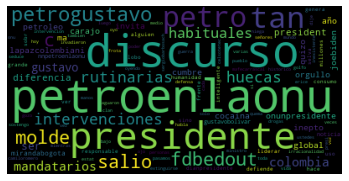

In [39]:
#displaying the word cloud
plt.imshow(word_clouds['#PetroEnLaONU'])
plt.axis('off')
plt.show()

### Sentiment analysis

In [ ]:
#The sentiment analysis is used through the package "Transformers", which uses pretrained NLP models for several tasks. There are models available for several tasks and languages
# One model is loaded for the spanish tweets (finiteautomata/beto-sentiment-analysis) and another for the english and german tweets (nlptown/bert-base-multilingual-uncased-sentiment)
# The spanish model outputs three classes "POS", "NEU" and "NEG", whereas the multilingual one outputs 1 star up to 5 stars. The star output is translated into "POS", "NEU" and "NEG"
# to maintain the consistency of the output and results.

In [50]:
spa_sentiment_classifier = pipeline('sentiment-analysis',
                           tokenizer = "finiteautomata/beto-sentiment-analysis",
                           model = "finiteautomata/beto-sentiment-analysis")

Downloading: 100%|██████████| 440M/440M [00:24<00:00, 17.7MB/s] 
Downloading: 100%|██████████| 528/528 [00:00<00:00, 527kB/s]
Downloading: 100%|██████████| 242k/242k [00:00<00:00, 562kB/s]  
Downloading: 100%|██████████| 481k/481k [00:00<00:00, 1.10MB/s]
Downloading: 100%|██████████| 67.0/67.0 [00:00<00:00, 67.1kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 104kB/s]


In [51]:
#The sentiment model is passed to the tweets and the corresponding sentiments and scores are stored in a list. Each list is the value of a dictionary with
# the trend names as keys
sentiments = {}
for trend in trend_sentences.keys():
    print(trend)
    sentiment_analysis = spa_sentiment_classifier(trend_sentences_processed[trend])
    sentiments[trend] = sentiment_analysis

#HarryAlCampin
sábados felices
Falcao
Haaland
Liverpool
Barboza
Chris Martin
Coldplay
Colpensiones
Crystal Palace
Discurso
Dorlan
El Tarra
James Rodríguez
Lorenzo
Amazonas
Luis Díaz
Mayer
Naciones Unidas
Patriotas
Rodolfo
Roger Federer
Santa Fe
Sergio Arboleda
mantilla
ospina
BTS GLOBAL DOMINATION
Elena
#LeandroDiaz
#PetroEnLaONU
#OrgulloPetrista
#NoHayFuturoSin
#UnAbusoEs


### Putting  tweets and sentiment labes and scores together

In [87]:
trend_sentences['#HarryAlCampin'][0][0] #Sample tweet

"['RT @fwnln_sam: #harryalcampin es un sold out seguro les propongo un sueño 39 mil personas coreando cada canción y haciendo que Harry se ena…"

In [72]:
# A dataframe is created with the sentiment analysis, added a column with the trend sentence and the trend to which the tweet corresponds 
# (on top of the sentiment label and scores calculated above)
df_list = []
for trend in trend_sentences.keys():
    #sentiment_list.extend(sentiments[trend])
    df = pd.DataFrame(sentiments[trend])
    df['Trend'] = trend
    df['Tweet'] = trend_sentences_flat[trend]
    df_list.append(df)

In [75]:
df_sentiments = pd.concat(df_list)
df_sentiments = df_sentiments[['Trend', 'Tweet', 'label', 'score']]
#df_sentiments.to_excel('Tweets_sentiments_Colombia.xlsx')

In [85]:
# Generating a file out of each n-gram dataframe for each trend
for trend in n_gram_dfs.keys():
    n_gram_dfs[trend].to_excel('n_grams_'+ trend + '_Colombia.xlsx')

### In Germany

In [113]:
#Relevant trends are those that appear twice of more i.e. not only in one single day across the timeline
freq_trends_germany.head()
relevant_trends_germany = freq_trends_germany.loc[freq_trends_germany['count']>1]
print(relevant_trends_germany.shape)
relevant_trends_germany.head()

(119, 2)


,trend,count
144,Heizung,6
171,Kopftuch,6
79,Bürgergeld,5
233,Referendum,5
139,Guten Morgen ihr Lieben,5


In [114]:
#relevant_trends_germany.to_excel('relevant_trends_germany.xlsx')

### Content of the relevant trends in Germany

In [115]:
trend_sentences = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend
trend_words = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend
trend_sentences_flat = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend, stored in a flat list
trend_words_flat = {} #Dictionary where the keys will be the relevant trends and the values will be the tweets corresponding to that trend, stored in a flat list

for trend in relevant_trends_germany.trend.values:
    trend_sentences[trend] = []
    trend_words[trend] = []

for file in germany_files:
    trends_file_df = pd.read_excel('./Trends/'+file)
    trends_in_file = trends_file_df.columns[1:]
    for trend in trends_in_file:
        if trend in relevant_trends_germany.trend.values:
            sentences = trends_file_df.iloc[0][trend].split("\', \'") # In each file, full tweets are stored in row 1
            words = trends_file_df.iloc[3][trend].split("\', \'") # In each file, the lists of words are stored in row 4
            trend_sentences[trend].append(sentences)
            trend_words[trend].append(words)

for trend in trend_sentences.keys():
    trend_sentences_flat[trend] = [item for sublist in trend_sentences[trend] for item in sublist]
    trend_words_flat[trend] = [item for sublist in trend_words[trend] for item in sublist]

In [116]:
trend_sentences.keys()

dict_keys(['Heizung', 'Kopftuch', 'Bürgergeld', 'Referendum', 'Guten Morgen ihr Lieben', 'Arielle', 'Russen', 'Panzer', 'Leyen', 'Löhne', 'Ungarn', 'Figma', '#OpIran', 'Klaus Ernst', 'schönen sonntag', 'Armenien', 'Iran', 'Schweden', 'Cosimo', 'Länderfinanzausgleich', '#MCIBVB', 'Eric', 'Start in den Tag', 'Wölfin', 'Querdenker', '#DankeRobert', 'Adobe', 'Reservisten', 'Oktoberfest', 'Dingos', 'Wochenstart', 'Start ins Wochenende', 'Montagmorgen', 'hobi', 'Asyl', 'Handwerk', 'Steuerbord', 'Glück mit dem Wetter', 'Übergewicht', 'Gina', 'Gentner', 'Gasumlage', 'Gast', 'The Queue', 'Herr Lindner', 'Twitch', 'Ventil', 'Waffen', 'Wehrle', 'Wochenbeginn', 'Dirndl', 'Deserteure', 'Führungsrolle', 'Katha', 'Herr Stegner', 'Herzlichen Glückwunsch', 'Polizist', 'Pandemie', 'Robin', 'Neuseeland', 'Nagelsmann', 'Most Favorite', 'Modeste', 'SBCs', 'Mislintat', 'Meyer', 'Sachsen', 'Meerjungfrau', 'Maske', "Martha's Vineyard", '#29EuroTicket', 'Least Favorite', 'Schönen Donnerstag', 'Lahm', 'Kälte', 

In [42]:
#NLP Preprocessing:
# Diacritics and special characters are removed  (in the case of german, the Umlauts are also replaced)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') #These characters will be replaced by a space
BAD_SYMBOLS_RE = re.compile('[^0-9a-z ñ+_]') #These characters will be removed
STOPWORDS_DE = set(stopwords.words('german'))
STOPWORDS_DE = STOPWORDS_DE.union(STOPWORDS_ENG) #English and german stopwords are removed
## Some commonly observed stopwords are also removed
STOPWORDS_DE.add('http')
STOPWORDS_DE.add('https')
STOPWORDS_DE.add('tco')
STEMMER_DE = SnowballStemmer('german')

# For the ngrams and word clouds, all the preprocessed sentences and words are packed together in flat lists, to pass them to the models.
#The flat lists are done by each trend using the trend's name as key in a dictionary.
trend_sentences_processed = {}
trend_words_processed = {}
for trend in trend_sentences.keys():
    text_preprocessed = [text_prepare(x) for x in trend_sentences_flat[trend]]
    trend_sentences_processed[trend] = text_preprocessed

for trend in trend_sentences.keys():
    word_tokens = [word_tokenize(trend_sentences_processed[trend][i]) for i in range(len(trend_sentences_processed[trend]))]
    word_tokens_flat = [item for sublist in word_tokens for item in sublist]
    trend_words_processed[trend] = [w for w in word_tokens_flat if w.isalpha()]

### N-grams

In [130]:
n_gram_dfs = {}

for trend in trend_sentences.keys():
    try:
        n_grams = get_n_grams_df(trend_sentences_processed[trend], 30, STOPWORDS_DE) #calling the get_n_grams_df function to retrieve the ngrams for each trend
        n_gram_df = pd.concat([n_grams['unigrams'], n_grams['bigrams'], n_grams['trigrams']], axis=1) #putting the data together in a dataframe
        n_gram_dfs[trend]=n_gram_df
    except:
        pass

#n_gram_dfs.head()

In [131]:
trend_sentences_processed.keys()

dict_keys(['Heizung', 'Kopftuch', 'Bürgergeld', 'Referendum', 'Guten Morgen ihr Lieben', 'Arielle', 'Russen', 'Panzer', 'Leyen', 'Löhne', 'Ungarn', 'Figma', '#OpIran', 'Klaus Ernst', 'schönen sonntag', 'Armenien', 'Iran', 'Schweden', 'Cosimo', 'Länderfinanzausgleich', '#MCIBVB', 'Eric', 'Start in den Tag', 'Wölfin', 'Querdenker', '#DankeRobert', 'Adobe', 'Reservisten', 'Oktoberfest', 'Dingos', 'Wochenstart', 'Start ins Wochenende', 'Montagmorgen', 'hobi', 'Asyl', 'Handwerk', 'Steuerbord', 'Glück mit dem Wetter', 'Übergewicht', 'Gina', 'Gentner', 'Gasumlage', 'Gast', 'The Queue', 'Herr Lindner', 'Twitch', 'Ventil', 'Waffen', 'Wehrle', 'Wochenbeginn', 'Dirndl', 'Deserteure', 'Führungsrolle', 'Katha', 'Herr Stegner', 'Herzlichen Glückwunsch', 'Polizist', 'Pandemie', 'Robin', 'Neuseeland', 'Nagelsmann', 'Most Favorite', 'Modeste', 'SBCs', 'Mislintat', 'Meyer', 'Sachsen', 'Meerjungfrau', 'Maske', "Martha's Vineyard", '#29EuroTicket', 'Least Favorite', 'Schönen Donnerstag', 'Lahm', 'Kälte', 

In [132]:
n_gram_dfs['Arielle'].head()

,Unigram,Unigram_count,Bigram,Bigram_count,Trigram,Trigram_count
0,arielle,583,mayorkingz youre,83,mayorkingz youre everything,83
1,mayorkingz,135,youre everything,83,youre everything amp,83
2,rt,126,everything amp,83,everything amp ever,83
3,amp,109,amp ever,83,amp ever wished,83
4,right,102,ever wished,83,ever wished came,83


In [139]:
# Word clouds can also be generated, showing the relative frequency of words appearing for each trend in a visual way
# With the size of the word in the word cloud representing it's frequeny relative to the toal amount of words in the corpus
word_clouds = {}
for trend in trend_sentences.keys():
    try:
        corpus = ' '.join(trend_words_processed[trend])
        #Instantiate wordcloud object and use method to feed it our corpus
        word_clouds[trend] = WordCloud(collocations=False).generate_from_text(corpus)
    except:
        pass

C:\Users\VELASQ~1\AppData\Local\Temp/ipykernel_11716/120345593.py:1: DeprecationWarning: The symbol module is deprecated and will be removed in future versions of Python
  from symbol import except_clause


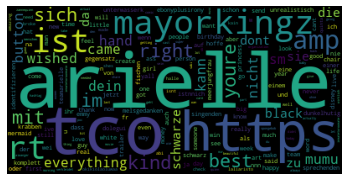

In [140]:
#displaying the word cloud
plt.imshow(word_clouds['Arielle'])
plt.axis('off')
plt.show()

### Sentiment Analysis

In [ ]:
#The sentiment analysis is used through the package "Transformers", which uses pretrained NLP models for several tasks. There are models available for several tasks and languages
# One model is loaded for the spanish tweets (finiteautomata/beto-sentiment-analysis) and another for the english and german tweets (nlptown/bert-base-multilingual-uncased-sentiment)

In [ ]:
de_sentiment_classifier = pipeline('sentiment-analysis',
                           tokenizer = "nlptown/bert-base-multilingual-uncased-sentiment",
                           model = "nlptown/bert-base-multilingual-uncased-sentiment")

#The sentiment model is passed to the tweets and the corresponding sentiments and scores are stored in a list. Each list is the value of a dictionary with
# the trend names as keys
sentiments = {}
for trend in trend_sentences.keys():
    print(trend)
    try:
        sentiment_analysis = de_sentiment_classifier(trend_sentences_processed[trend])
        sentiments[trend] = sentiment_analysis
    except:
        pass

### Putting  tweets and sentiment labes and scores together

In [184]:
sentiments.keys()

dict_keys(['Heizung', 'Kopftuch', 'Referendum', 'Guten Morgen ihr Lieben', 'Arielle', 'Russen', 'Panzer', 'Leyen', 'Löhne', 'Figma', '#OpIran', 'Klaus Ernst', 'schönen sonntag', 'Armenien', 'Iran', 'Schweden', 'Länderfinanzausgleich', '#MCIBVB', 'Eric', 'Start in den Tag', 'Wölfin', 'Querdenker', '#DankeRobert', 'Adobe', 'Reservisten', 'Oktoberfest', 'Dingos', 'Wochenstart', 'Start ins Wochenende', 'Montagmorgen', 'hobi', 'Asyl', 'Handwerk', 'Steuerbord', 'Glück mit dem Wetter', 'Übergewicht', 'Gina', 'Gentner', 'Gasumlage', 'The Queue', 'Herr Lindner', 'Twitch', 'Ventil', 'Wehrle', 'Wochenbeginn', 'Dirndl', 'Deserteure', 'Führungsrolle', 'Katha', 'Herr Stegner', 'Herzlichen Glückwunsch', 'Polizist', 'Robin', 'Neuseeland', 'Nagelsmann', 'Most Favorite', 'Modeste', 'SBCs', 'Mislintat', 'Meyer', 'Sachsen', 'Meerjungfrau', 'Maske', '#29EuroTicket', 'Least Favorite', 'Schönen Donnerstag', 'Lahm', 'Kälte', 'Krisengebiet', 'Schönen Samstag', 'Kobel', 'Sonnenaufgang', 'Kanonenfutter', 'Sprach

In [172]:
# A dataframe is created with the sentiment analysis, added a column with the trend sentence and the trend to which the tweet corresponds 
# (on top of the sentiment label and scores calculated above)
df_list = []
for trend in sentiments.keys():
    #sentiment_list.extend(sentiments[trend])
    df = pd.DataFrame(sentiments[trend])
    df['Trend'] = trend
    df['Tweet'] = trend_sentences_flat[trend]
    df_list.append(df)

In [175]:
df_sentiments = pd.concat(df_list)
df_sentiments = df_sentiments[['Trend', 'Tweet', 'label', 'score']]

In [181]:
df_sentiments.label.unique()

array(['POS', 'NEG', 'NEU'], dtype=object)

In [180]:
# The spanish model outputs three classes "POS", "NEU" and "NEG", whereas the multilingual one outputs 1 star up to 5 stars. The star output is translated into "POS", "NEU" and "NEG"
# to maintain the consistency of the output and results.
df_sentiments.loc[df_sentiments['label'].isin(['5 stars','4 stars']), 'label'] = 'POS'
df_sentiments.loc[df_sentiments['label'].isin(['1 star','2 stars']), 'label'] = 'NEG'
df_sentiments.loc[df_sentiments['label'].isin(['3 stars']), 'label'] = 'NEU'

In [183]:
#df_sentiments.to_excel('Tweets_sentiments_Germany.xlsx')

In [167]:
# Generating a file out of each n-gram dataframe for each trend
for trend in n_gram_dfs.keys():
    n_gram_dfs[trend].to_excel('n_grams_'+ trend + '_Germany.xlsx')